In [1]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import AdamW, Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

2024-08-20 23:19:27.567261: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-20 23:19:27.571703: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-20 23:19:27.584860: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-20 23:19:27.606723: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-20 23:19:27.613099: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-20 23:19:27.628888: I tensorflow/core/platform/cpu_feature_gu

In [2]:
from keras.layers import LeakyReLU

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def build_model(hidden_layers, hidden_nodes, activation, output_activation, alpha):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(hidden_nodes))
    model.add(LeakyReLU(negative_slope=alpha))
    for i in range(hidden_layers-1):
        model.add(Dense(hidden_nodes))
        model.add(LeakyReLU(negative_slope=alpha))
    model.add(Dense(1, activation=output_activation))  # Output layer for regression
    return model

# Define function to evaluate model
def evaluate_model(params, callbacks):
    model = build_model(params['hidden_layers'], params['hidden_nodes'], 
                        params['activation'], params['output_activation'], params['alpha'])
    
    optimizer = params['optimizer'](learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss=params['loss_function'], metrics=['mean_squared_error','r2_score'])
    
    history = model.fit(X_train, y_train, epochs=1000, verbose=2, validation_split=0.2, callbacks=callbacks)
    return history, model

In [5]:
# Simulating a dataset
data = pd.read_csv("battle5_data.csv")


In [6]:
data

,OppLatVelocity,OppVelocity,Distance,BulletPower,ForwardWallDistance,BackWallDistance,TimeDecelerated,TimeChangedDir,Offset
0,-3.976384,-8.0,350.174486,1.399994,346.239670,739.494659,5,3,0.318937
1,-1.377810,-8.0,250.463164,1.736179,356.229026,366.038526,11,0,-0.217589
2,2.609841,-8.0,123.884651,1.967783,406.477241,197.021398,25,0,0.157598
3,0.000000,0.0,40.676622,1.998130,538.838947,125.358900,0,2,0.003645
4,-0.527919,-8.0,60.439956,2.431214,381.867620,419.453975,14,4,0.186858
...,...,...,...,...,...,...,...,...,...
31853,5.063480,-8.0,154.356282,1.924196,584.243731,314.536560,418,10,0.796812
31854,5.694362,-8.0,148.632115,1.924196,615.419751,319.013726,419,11,0.829913
31855,6.287337,-8.0,143.552419,1.924196,652.108545,325.885070,420,12,0.847401
31856,6.823308,-8.0,139.213747,1.924196,695.507284,335.575254,421,13,0.919957


In [7]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [8]:
data

,OppLatVelocity,OppVelocity,Distance,BulletPower,ForwardWallDistance,BackWallDistance,TimeDecelerated,TimeChangedDir,Offset
0,7.999841,-8.0,490.392108,2.014834,620.405688,182.911575,9,3,0.555745
1,0.000000,0.0,518.746509,1.882826,569.040113,150.575470,0,7,-0.517823
2,0.890174,-1.0,253.931265,1.832468,173.640568,428.301006,8,9,0.590579
3,0.000000,-0.0,505.603847,1.399994,486.512290,500.229921,0,0,-0.748087
4,0.000000,0.0,536.414893,1.967852,339.776126,460.897763,220,147,0.000000
...,...,...,...,...,...,...,...,...,...
31853,3.017057,-8.0,219.970923,1.924196,198.228676,478.440401,159,5,0.694467
31854,-4.394829,8.0,494.809350,1.399994,466.302576,404.248000,12,1,0.694861
31855,7.987342,8.0,598.285439,1.959954,305.328507,304.005814,12,12,0.725428
31856,-5.517506,-6.0,591.984619,1.073906,223.532458,652.176565,0,19,-0.219313


In [9]:
# Preprocessing data
X = data.drop(columns=["Offset"]).values
y = data["Offset"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

In [10]:
param_grid = {
    'hidden_nodes': [n for n in range(10, 51,10)],
    'hidden_layers': [1, 2, 3],
    'activation': ['relu'],
    'output_activation': ['tanh'],  
    'alpha': [0.01, 0.015, 0.02, 0.025],
    'loss_function': ['log_cosh','huber', 'mean_squared_error','mean_absolute_error'],
    'learning_rate': [0.0005],
    'optimizer': [Adam]
}

In [11]:
# Initial set of fixed parameters (use the first value in each grid as default)
best_params = {key: values[0] for key, values in param_grid.items()}
best_histories = {}
# Collect all histories for later plotting
all_histories = {}

# Iterate through each hyperparameter
for i, (key, values) in enumerate(param_grid.items()):
    best_value = None
    best_loss = float('inf')
    histories = {}
    
    # If this is not the first parameter, reuse the history of the initial value from previous iterations
    if i > 0:
        initial_value = values[0]
        histories[initial_value] = p_history  # Reuse the initial history
        best_loss = p_best_loss
        best_value = values[0]
        
    # Determine the start index
    start_index = 1 if i > 0 else 0

    for value in values[start_index:]:
        # Update the parameter to the current value being tested
        params = best_params.copy()
        params[key] = value

        print(params)
        # EarlyStopping callback to stop when validation loss plateaus
        early_stopping_plateau = EarlyStopping(monitor='val_loss', 
                                               patience=100,  # Number of epochs to wait after plateau
                                               verbose=1, 
                                               restore_best_weights=True, mode="min")

        
        # ModelCheckpoint callback to save the best model
        model_checkpoint = ModelCheckpoint('best_model4.keras',  # Filepath to save the model
                                           monitor='val_loss',  # Monitor validation loss
                                           save_best_only=True,  # Save only the best model
                                           verbose=0)
        
        history, model = evaluate_model(params, callbacks=[early_stopping_plateau, model_checkpoint])
        
        val_loss = min(history.history['val_loss'])  # Use the minimum validation loss during training
        
        histories[value] = history.history
        
        # Keep track of the best parameter value
        if val_loss < best_loss:
            best_loss = val_loss
            best_value = value
            p_history = history.history

    p_best_loss = best_loss
    # Update the fixed parameters with the best value found for this hyperparameter
    best_params[key] = best_value
    best_histories[key] = histories
    all_histories[key] = histories  # Store all histories for this parameter
    print(f"Best {key}: {best_value} with loss: {best_loss}")

{'hidden_nodes': 10, 'hidden_layers': 1, 'activation': 'relu', 'output_activation': 'tanh', 'alpha': 0.01, 'loss_function': 'log_cosh', 'learning_rate': 0.0005, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>}
Epoch 1/1000
717/717 - 2s - 3ms/step - loss: 0.1125 - mean_squared_error: 0.2471 - r2_score: -2.1667e-01 - val_loss: 0.0918 - val_mean_squared_error: 0.1974 - val_r2_score: 0.0230
Epoch 2/1000
717/717 - 1s - 2ms/step - loss: 0.0881 - mean_squared_error: 0.1886 - r2_score: 0.0714 - val_loss: 0.0871 - val_mean_squared_error: 0.1866 - val_r2_score: 0.0762
Epoch 3/1000
717/717 - 1s - 2ms/step - loss: 0.0856 - mean_squared_error: 0.1832 - r2_score: 0.0982 - val_loss: 0.0855 - val_mean_squared_error: 0.1833 - val_r2_score: 0.0930
Epoch 4/1000
717/717 - 1s - 2ms/step - loss: 0.0846 - mean_squared_error: 0.1807 - r2_score: 0.1102 - val_loss: 0.0848 - val_mean_squared_error: 0.1816 - val_r2_score: 0.1014
Epoch 5/1000
717/717 - 1s - 2ms/step - loss: 0.0838 - mean_squared_error: 0.179

In [12]:
# Output the best parameters
print("Best Parameters for each tested component:")
print(best_params)

Best Parameters for each tested component:
{'hidden_nodes': 50, 'hidden_layers': 2, 'activation': 'relu', 'output_activation': 'tanh', 'alpha': 0.02, 'loss_function': 'log_cosh', 'learning_rate': 0.0005, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>}


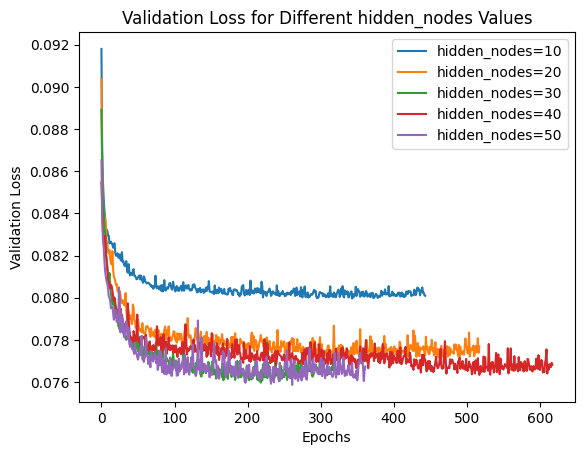

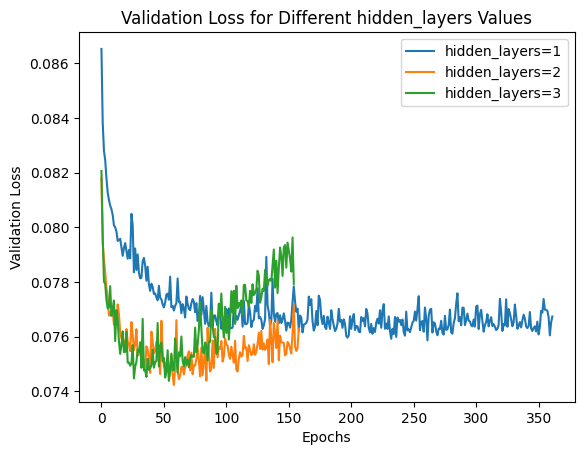

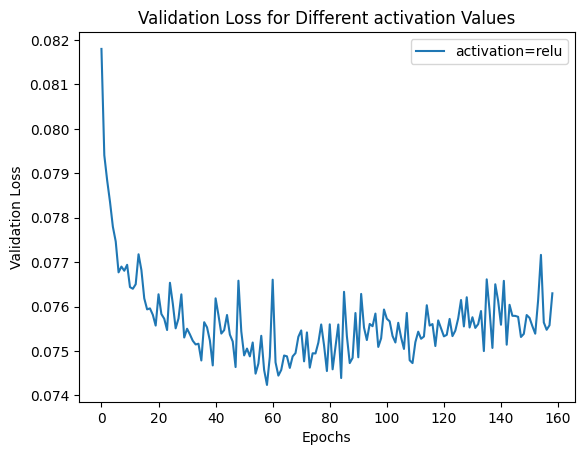

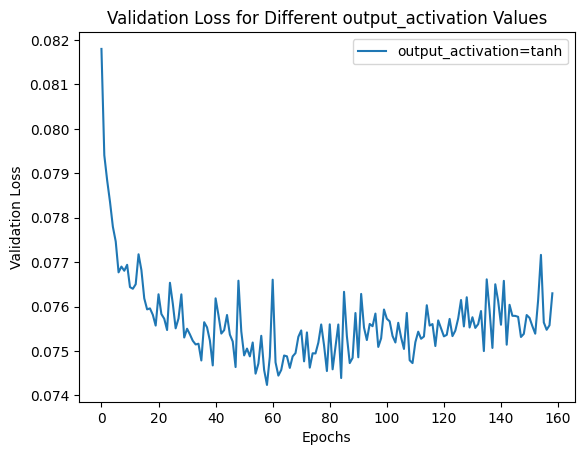

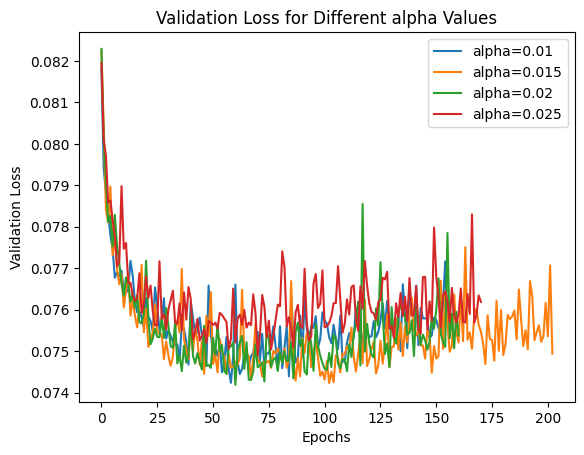

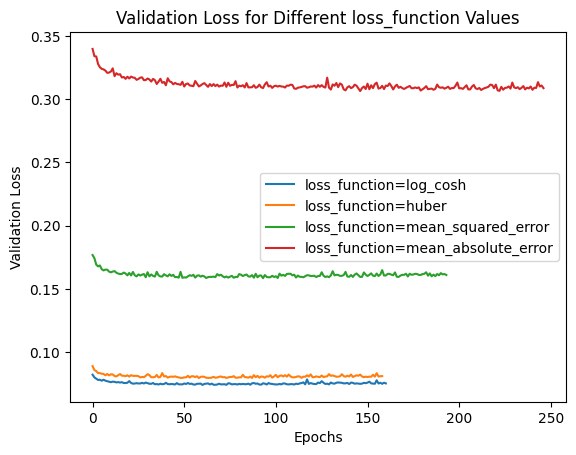

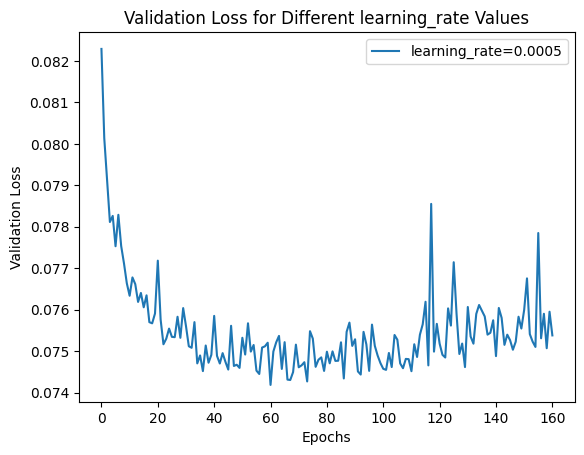

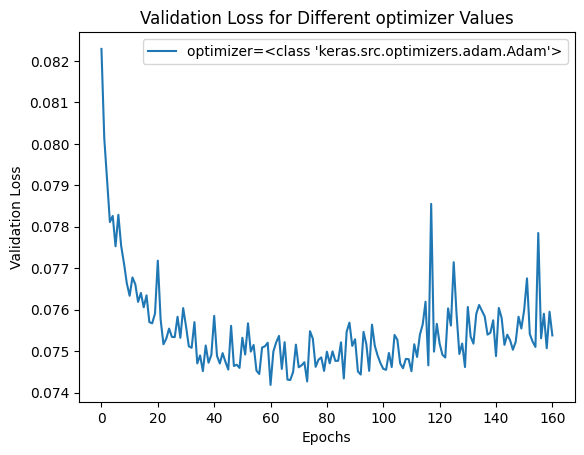

In [13]:
for key, histories in all_histories.items():
    plt.figure()
    for value, hist in histories.items():
        plt.plot(hist['val_loss'], label=f'{key}={value}')
    plt.title(f'Validation Loss for Different {key} Values')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Loss')
    plt.legend()
    plt.show()

Epoch 1/1000
717/717 - 7s - 10ms/step - loss: 0.0863 - mean_squared_error: 0.1843 - r2_score: 0.0926 - val_loss: 0.0824 - val_mean_squared_error: 0.1762 - val_r2_score: 0.1278
Epoch 2/1000
717/717 - 2s - 3ms/step - loss: 0.0798 - mean_squared_error: 0.1702 - r2_score: 0.1622 - val_loss: 0.0815 - val_mean_squared_error: 0.1745 - val_r2_score: 0.1363
Epoch 3/1000
717/717 - 3s - 4ms/step - loss: 0.0781 - mean_squared_error: 0.1665 - r2_score: 0.1803 - val_loss: 0.0802 - val_mean_squared_error: 0.1720 - val_r2_score: 0.1489
Epoch 4/1000
717/717 - 3s - 4ms/step - loss: 0.0769 - mean_squared_error: 0.1640 - r2_score: 0.1926 - val_loss: 0.0789 - val_mean_squared_error: 0.1686 - val_r2_score: 0.1657
Epoch 5/1000
717/717 - 3s - 4ms/step - loss: 0.0763 - mean_squared_error: 0.1626 - r2_score: 0.1992 - val_loss: 0.0785 - val_mean_squared_error: 0.1680 - val_r2_score: 0.1683
Epoch 6/1000
717/717 - 3s - 4ms/step - loss: 0.0757 - mean_squared_error: 0.1612 - r2_score: 0.2065 - val_loss: 0.0805 - val

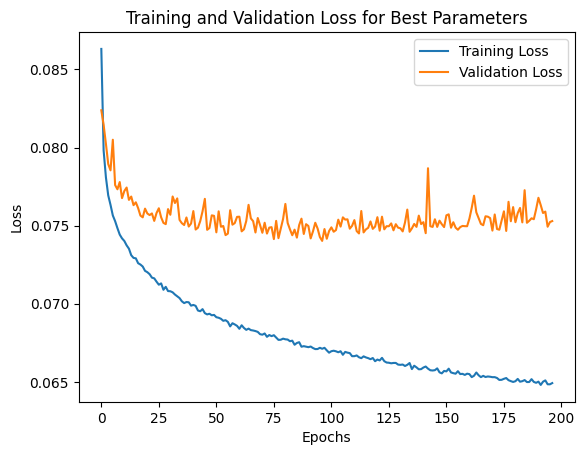

In [14]:
final_params = best_params
history, model = evaluate_model(final_params, callbacks=[early_stopping_plateau, model_checkpoint])

plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for Best Parameters')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [15]:
model.evaluate(X_test, y_test, verbose=1)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0729 - mean_squared_error: 0.1554 - r2_score: 0.2333


[0.0738755613565445, 0.15780168771743774, 0.22496020793914795]

In [16]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_22 (LeakyReLU)      │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_23 (LeakyReLU)      │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,155 (35.77 KB)

 Trainable params: 3,051 (11.92 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,104 (23.85 KB)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


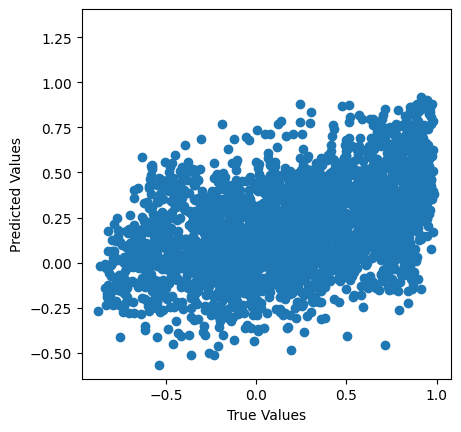

In [17]:
predictions = model.predict(X_test).flatten()

# Visualize predictions
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.axis('equal')
plt.axis('square')

plt.show()


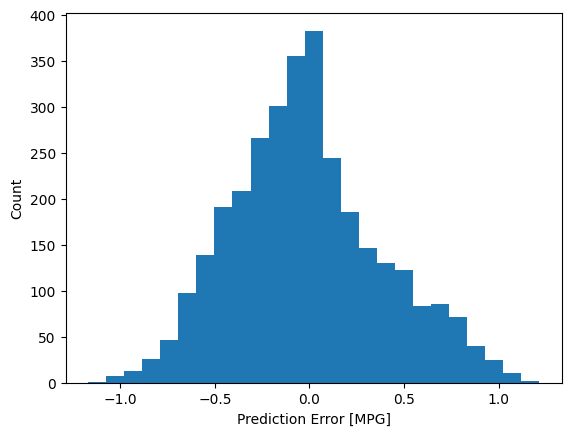

In [18]:
error = predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")